<h2 style="color:#DC143C;">1. Linear Regression</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from numpy import mean
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
url = '../Datasets/housing (1).csv'
house = pd.read_csv(url, sep = ",")
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


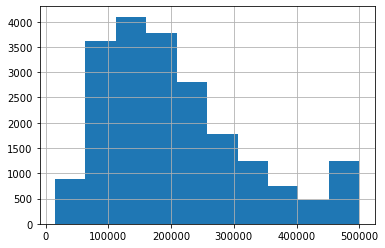

In [5]:
house['median_house_value'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd70053c490>,
      dtype=object)

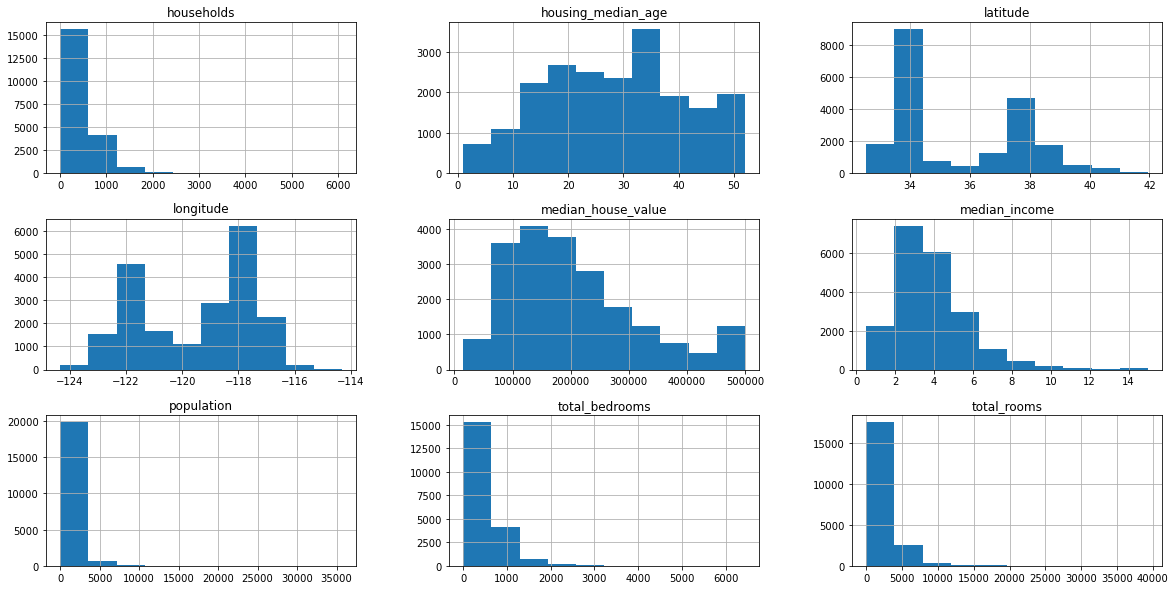

In [6]:
house.hist(bins=10, figsize=(20,10))

<h3>Encoding for ocean_proximity</h3>

In [7]:
house['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
label_encoder = preprocessing.LabelEncoder()
house.loc[:, ('ocean_proximity')] = label_encoder.fit_transform(house['ocean_proximity'])
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


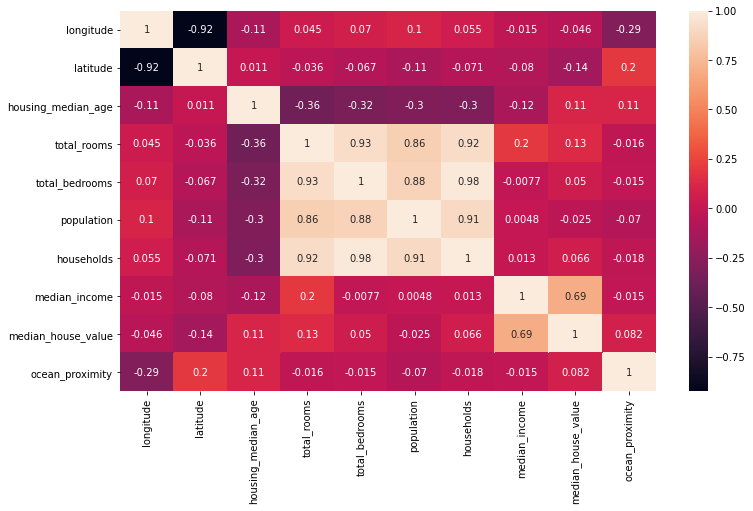

In [9]:
fig, ax = plt.subplots(figsize = (12,7))
sns.heatmap(house.corr(),annot = True)

In [10]:
house.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000


<b>Processing Data for Linear Regression</b>

Missing values 

In [12]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
house = house.drop(columns=['total_bedrooms'])

In [14]:
scaler = StandardScaler()
scaler = scaler.fit(house)

In [15]:
X = house.drop('median_house_value',axis=1)
y = house['median_house_value']

In [17]:
X

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.30, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14448, 8) (14448,)
(6192, 8) (6192,)


<h3 style="color:#DC143C;">1.1 Univariate Linear Regression</h3>

In [19]:
numerical_features = list(X.columns)
numerical_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [20]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
7061,-118.02,33.93,35.0,2400.0,1218.0,408.0,4.1312,0
14689,-117.09,32.79,20.0,2183.0,999.0,496.0,2.8631,4
17323,-120.14,34.59,24.0,1601.0,731.0,285.0,4.2026,4
10056,-121.00,39.26,14.0,810.0,302.0,138.0,3.1094,1
15750,-122.45,37.77,52.0,3188.0,1526.0,664.0,3.3068,3
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,658.0,217.0,6.3700,0
11964,-117.43,34.02,33.0,3084.0,1753.0,449.0,3.0500,1
5390,-118.38,34.03,36.0,2101.0,1756.0,527.0,2.9344,0
860,-121.96,37.58,15.0,3575.0,1777.0,559.0,5.7192,0


In [21]:
def print_results(true_val, predicted_val):  
    mae = mean_absolute_error(true_val, predicted_val)
    mse = mean_squared_error(true_val, predicted_val)
    rmse = np.sqrt(mean_squared_error(true_val, predicted_val))
    r2_square = r2_score(true_val, predicted_val)
    sse = np.sum((true_val - predicted_val)**2)
    print('Mean Absolute Error (MAE):\t', mae)
    print('Mean Squared Error (MSE):\t', mse)
    print('Root Mean Squared Error (RMSE):\t', rmse)
    print('Sum of Squared Error (SSE):\t', sse)
    print('R2 Square\t\t\t', r2_square)

LONGITUDE
------------------------------------------------------
### Test ###
Mean Absolute Error (MAE):	 90260.31217976088
Mean Squared Error (MSE):	 13108337081.069883
Root Mean Squared Error (RMSE):	 114491.64633749436
Sum of Squared Error (SSE):	 81166823205984.72
R2 Square			 0.0013000743342745924
Mean Absolute Percentage Error:	 62.186275891206144
### Train ###
Mean Absolute Error (MAE):	 207043.54499653925
Mean Squared Error (MSE):	 42899675926.05618
Root Mean Squared Error (RMSE):	 207122.36944872997
Sum of Squared Error (SSE):	 8.955075376909875e+18
R2 Square			 -10694301812.334515


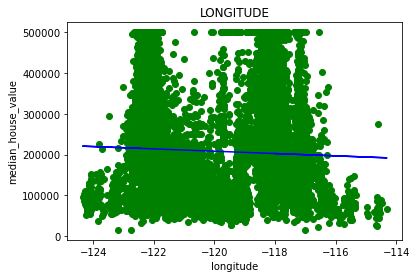



LATITUDE
------------------------------------------------------
### Test ###
Mean Absolute Error (MAE):	 89670.21434747649
Mean Squared Error (MSE):	 12829520291.697872
Root Mean Squared Error (RMSE):	 113267.47234620305
Sum of Squared Error (SSE):	 79440389646193.22
R2 Square			 0.022542609149946102
Mean Absolute Percentage Error:	 60.67738289931127
### Train ###
Mean Absolute Error (MAE):	 206888.31022494464
Mean Squared Error (MSE):	 43071187942.40269
Root Mean Squared Error (RMSE):	 207535.9919204442
Sum of Squared Error (SSE):	 8.990867772141309e+18
R2 Square			 -9443201555.276041


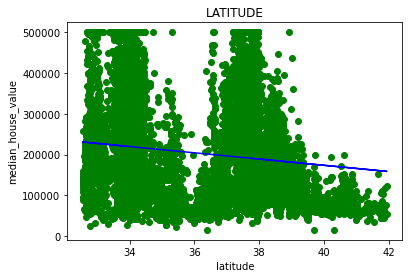



HOUSING_MEDIAN_AGE
------------------------------------------------------
### Test ###
Mean Absolute Error (MAE):	 90134.56848765086
Mean Squared Error (MSE):	 12985249122.849632
Root Mean Squared Error (RMSE):	 113952.83727424093
Sum of Squared Error (SSE):	 80404662568684.92
R2 Square			 0.010677917913109236
Mean Absolute Percentage Error:	 62.246545501894616
### Train ###
Mean Absolute Error (MAE):	 206895.38552048727
Mean Squared Error (MSE):	 42957481851.68253
Root Mean Squared Error (RMSE):	 207261.86781866685
Sum of Squared Error (SSE):	 8.967211775494282e+18
R2 Square			 -270015347.63354367


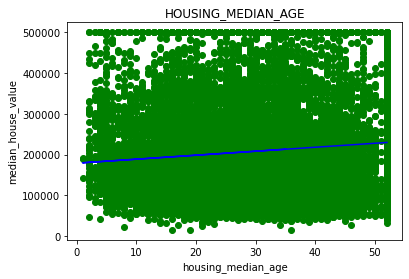



TOTAL_ROOMS
------------------------------------------------------
### Test ###
Mean Absolute Error (MAE):	 89391.49780753141
Mean Squared Error (MSE):	 12909077876.73948
Root Mean Squared Error (RMSE):	 113618.12301186584
Sum of Squared Error (SSE):	 79933010212770.86
R2 Square			 0.016481264085670855
Mean Absolute Percentage Error:	 60.86643491688568
### Train ###
Mean Absolute Error (MAE):	 204279.0216638981
Mean Squared Error (MSE):	 41915622522.65881
Root Mean Squared Error (RMSE):	 204733.0518569457
Sum of Squared Error (SSE):	 8.763923188911103e+18
R2 Square			 -8958.238209074589


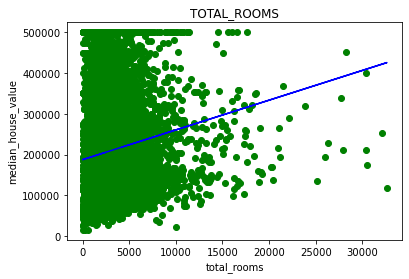



POPULATION
------------------------------------------------------
### Test ###
Mean Absolute Error (MAE):	 90610.55718957345
Mean Squared Error (MSE):	 13116977971.419659
Root Mean Squared Error (RMSE):	 114529.37601951588
Sum of Squared Error (SSE):	 81220327599030.53
R2 Square			 0.0006417409013886877
Mean Absolute Percentage Error:	 62.37677853101098
### Train ###
Mean Absolute Error (MAE):	 205496.03356866003
Mean Squared Error (MSE):	 42244259198.742485
Root Mean Squared Error (RMSE):	 205534.08281533865
Sum of Squared Error (SSE):	 8.816925645817794e+18
R2 Square			 -32493.996648833585


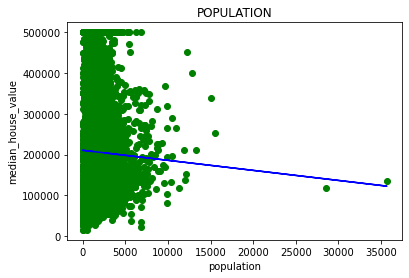



HOUSEHOLDS
------------------------------------------------------
### Test ###
Mean Absolute Error (MAE):	 90233.07228732448
Mean Squared Error (MSE):	 13068763810.158955
Root Mean Squared Error (RMSE):	 114318.69405376776
Sum of Squared Error (SSE):	 80921785512504.25
R2 Square			 0.004315088555580271
Mean Absolute Percentage Error:	 61.737526374214504
### Train ###
Mean Absolute Error (MAE):	 206422.89029623478
Mean Squared Error (MSE):	 42662899194.14118
Root Mean Squared Error (RMSE):	 206549.99199743674
Sum of Squared Error (SSE):	 8.906871315606729e+18
R2 Square			 -292044.7142277538


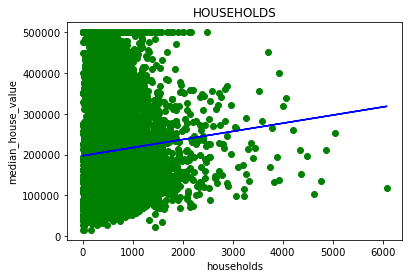



MEDIAN_INCOME
------------------------------------------------------
### Test ###
Mean Absolute Error (MAE):	 62315.59293823171
Mean Squared Error (MSE):	 6917979868.048501
Root Mean Squared Error (RMSE):	 83174.39430526982
Sum of Squared Error (SSE):	 42836131342956.32
R2 Square			 0.4729319258997021
Mean Absolute Percentage Error:	 38.54359328023379
### Train ###
Mean Absolute Error (MAE):	 206920.0840026924
Mean Squared Error (MSE):	 49161210683.48666
Root Mean Squared Error (RMSE):	 221723.27501524656
Sum of Squared Error (SSE):	 1.0262205721533118e+19
R2 Square			 -13548912403.93076


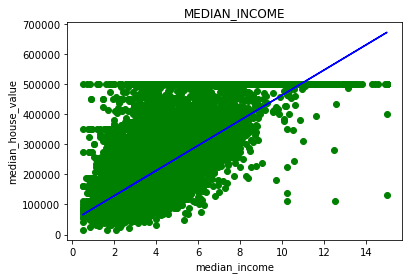



OCEAN_PROXIMITY
------------------------------------------------------
### Test ###
Mean Absolute Error (MAE):	 90207.98895460494
Mean Squared Error (MSE):	 13009887133.7839
Root Mean Squared Error (RMSE):	 114060.89221895425
Sum of Squared Error (SSE):	 80557221132389.9
R2 Square			 0.008800793489436964
Mean Absolute Percentage Error:	 62.21951898765175
### Train ###
Mean Absolute Error (MAE):	 206922.80696290144
Mean Squared Error (MSE):	 42894104585.552864
Root Mean Squared Error (RMSE):	 207108.9196185255
Sum of Squared Error (SSE):	 8.953922333936362e+18
R2 Square			 -21569728105.01821


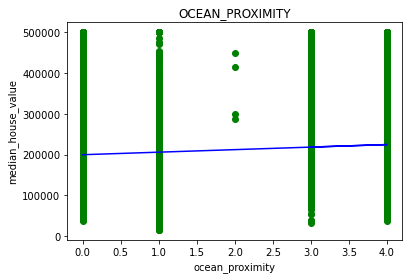



β0:	 199739.7672967549
β1:	 [6225.84147652]



In [24]:
for feature in numerical_features:
    X_tr = np.array(X_train[feature]).reshape(-1,1) 
    ind_model = linear_model.LinearRegression().fit(X_tr, y_train)
    train_predictions = ind_model.predict(X_tr)
    X_te = np.array(X_test[feature]).reshape(-1,1) 
    test_predictions = ind_model.predict(X_te)
    
    print(feature.upper())
    print("------------------------------------------------------")
    print('### Test ###')
    print_results(y_test, test_predictions)
    print("Mean Absolute Percentage Error:\t", np.mean(np.abs((y_test - test_predictions) / y_test)) * 100)
    print('### Train ###')
    print_results(X_tr, train_predictions)
    
    plt.scatter(X_tr, y_train, color = 'green')
    plt.plot(X_tr, train_predictions, color = 'blue')
    plt.title(feature.upper())
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.show()
    print()
    print()

print('β0:\t', ind_model.intercept_)
print('β1:\t', ind_model.coef_)
print()

<h3 style="color:#DC143C;">1.2 Multivariate Linear Regression</h3>

In [25]:
model = linear_model.LinearRegression().fit(X_train, y_train)
m_train_predictions = model.predict(X_train)
m_test_predictions = model.predict(X_test)

In [26]:
print('β0:\t', model.intercept_)
print('β1:\t', model.coef_)

β0:	 -3500769.9607842066
β1:	 [-4.19466173e+04 -4.20463034e+04  1.15011667e+03 -1.58115011e+00
 -4.22665666e+01  1.47049016e+02  3.84003055e+04 -3.12784079e+02]


In [27]:
print('### Test ###')
print_results(y_test, m_test_predictions)
print("Mean Absolute Percentage Error:\t", np.mean(np.abs((y_test - m_test_predictions) / y_test)) * 100)

print('--------------------------------------------------')
print('### Train ###')
print_results(y_train, m_train_predictions)

### Test ###
Mean Absolute Error (MAE):	 51053.25787003058
Mean Squared Error (MSE):	 4808070702.719742
Root Mean Squared Error (RMSE):	 69340.25311981305
Sum of Squared Error (SSE):	 29771573791240.64
R2 Square			 0.633681997670307
Mean Absolute Percentage Error:	 30.70891508061274
--------------------------------------------------
### Train ###
Mean Absolute Error (MAE):	 51363.69426852078
Mean Squared Error (MSE):	 4933983062.883352
Root Mean Squared Error (RMSE):	 70242.31675338843
Sum of Squared Error (SSE):	 71286187292538.67
R2 Square			 0.6317087499065234


<h2 style="color:#DC143C;">2. Regularization and Kfold Cross Validation</h2>


<h3>2. Ridge & Lasso Regression</h3>

In [65]:
url = '../Datasets/housing (1).csv'
house = pd.read_csv(url, sep=",")
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [66]:
house = house.drop(columns=['total_bedrooms'])
label_encoder = preprocessing.LabelEncoder()
house.loc[:, ('ocean_proximity')] = label_encoder.fit_transform(house['ocean_proximity'])
house.head(10)
scaler = StandardScaler().fit(house)

In [67]:
X = house.drop('median_house_value',axis=1)
y = house['median_house_value']

In [68]:
kfold = KFold(shuffle=True, n_splits=5)

For Alpha:	 1e-05

Model:		 Ridge
Accuracy:	 4912351306.293406 (175286278.347) 
MSE:		 4912351306.29 (+/- 350572556.69)

Model:		 Lasso
Accuracy:	 4914102314.636386 (161528465.051) 
MSE:		 4914102314.64 (+/- 323056930.10)

---------------------------------------------------------

For Alpha:	 1.9999999999999998e-05

Model:		 Ridge
Accuracy:	 4915622389.283052 (207979814.252) 
MSE:		 4915622389.28 (+/- 415959628.50)

Model:		 Lasso
Accuracy:	 4912272356.475383 (189897205.061) 
MSE:		 4912272356.48 (+/- 379794410.12)

---------------------------------------------------------

For Alpha:	 2.9999999999999997e-05

Model:		 Ridge
Accuracy:	 4911556626.466123 (218664393.640) 
MSE:		 4911556626.47 (+/- 437328787.28)

Model:		 Lasso
Accuracy:	 4912336917.322018 (170847588.322) 
MSE:		 4912336917.32 (+/- 341695176.64)

---------------------------------------------------------

For Alpha:	 3.9999999999999996e-05

Model:		 Ridge
Accuracy:	 4911047149.591972 (187818802.286) 
MSE:		 4911047149.59 (+

No handles with labels found to put in legend.


Model:		 Lasso
Accuracy:	 4905999697.021265 (140851207.728) 
MSE:		 4905999697.02 (+/- 281702415.46)

---------------------------------------------------------

(Ridge) Regularization coefficient with min error is:  0.0009


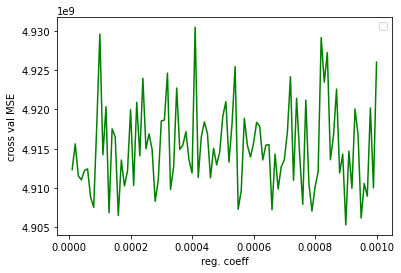

No handles with labels found to put in legend.


(Lasso) Regularization coefficient with min error is:  0.00054


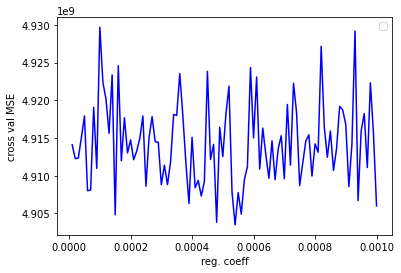

In [75]:
model_list = [Ridge, Lasso];
reg_coeffs = np.linspace(0.00001,0.001,100)

ridge_mean_cv_score=[]
lasso_mean_cv_score=[]

for c in reg_coeffs:
    print('For Alpha:\t', c)
    print()
    for Model in model_list:
        model = Model(alpha = c)
        cv_results_kfold = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
        print('Model:\t\t', Model.__name__)
        print('Accuracy:\t %3f (%.3f) ' % (mean(-cv_results_kfold), std(cv_results_kfold)))
        print("MSE:\t\t %0.2f (+/- %0.2f)" % (-cv_results_kfold.mean(), cv_results_kfold.std()*2))
        if Model.__name__ == 'Ridge':
            ridge_mean_cv_score.append(-cv_results_kfold.mean())
        else:
            lasso_mean_cv_score.append(-cv_results_kfold.mean())
        print()
    print('---------------------------------------------------------')
    print()

print("(Ridge) Regularization coefficient with min error is: ",reg_coeffs[ridge_mean_cv_score.index(min(ridge_mean_cv_score))])
plt.ylabel("cross val MSE")
plt.xlabel("reg. coeff")
plt.plot(reg_coeffs,ridge_mean_cv_score, color="green")
plt.legend()
plt.show()

print("(Lasso) Regularization coefficient with min error is: ",reg_coeffs[lasso_mean_cv_score.index(min(lasso_mean_cv_score))])
plt.ylabel("cross val MSE")
plt.xlabel("reg. coeff")
plt.plot(reg_coeffs, lasso_mean_cv_score, color="blue")
plt.legend()
plt.show()
